# Three-layer planar waveguide #

This code calculates and plots the normalized propagation constant $b$ in a three-layer planar waveguide as a function of the normalized frequency $V$ for the TE and TM propagated modes.

<br>

<div style="text-align: center;">
  <img src="planar_waveguide.png" width="300" heigth="200">
</div>

<br>

In this waveguide, we have, for TE modes:

$$2V\sqrt{1-b} = m\pi + \arctan{\sqrt{\frac{b+\delta}{1-b}}} + \arctan{\sqrt{\frac{b}{1-b}}}$$

And for TM modes:

$$2V\sqrt{1-b} = m\pi + \arctan{\left(p_{c}\sqrt{\frac{b+\delta}{1-b}}\right)} + \arctan{\left(p_{s}\sqrt{\frac{b}{1-b}}\right)}$$

Where:

$$\delta = \frac{{n_{s}}^{2}-{n_{c}}^{2}}{{n_{f}}^{2}-{n_{s}}^{2}}$$

$$p_{c} = \left(\frac{n_{f}}{n_{c}}\right)^{2}$$

$$p_{s} = \left(\frac{n_{f}}{n_{s}}\right)^{2}$$

In [21]:
import numpy as np
import matplotlib.pyplot as plt

nf = 3.5
ns = 1.5
nc = 1

micrometers = 1e-6

a = 0.25 * micrometers
lmbd0 = 1.55 * micrometers
k0 = 2 * np.pi / lmbd0

d = (ns**2 - nc**2) / (nf**2 - ns**2) 

pc = (nf/nc)**2
ps = (nf/ns)**2

In [22]:
def Vcm(V):
    arctan = np.arctan(np.sqrt(d))
    V_max = np.max(V)
    M = 0
    Vc = 0
    while True:
        Vc = (M*np.pi + arctan) / 2
        if Vc <= V_max:
            M += 1
        else:
            break
    return M # Return the maximum index of the propagating modes

def V_TE(b, M):
    v = []
    for m in range(0, M, 1):
        arctan1 = np.arctan(np.sqrt((b+d)/(1-b)))
        arctan2 = np.arctan(np.sqrt(b/(1-b)))
        vm = (m*np.pi + arctan1 + arctan2) / (2 * np.sqrt(1-b))
        v.append(vm)
    return np.array(v) 

def V_TM(b, M):
    v = []
    for m in range(0, M, 1):
        arctan1 = np.arctan(pc * np.sqrt((b+d)/(1-b)))
        arctan2 = np.arctan(ps * np.sqrt(b/(1-b)))
        vm = (m*np.pi + arctan1 + arctan2) / (2 * np.sqrt(1-b))
        v.append(vm)
    return np.array(v)

## Ploting the graphs ##

Visualizing the first 3 modes.
Asymmetry parameter: δ = 0.12500.


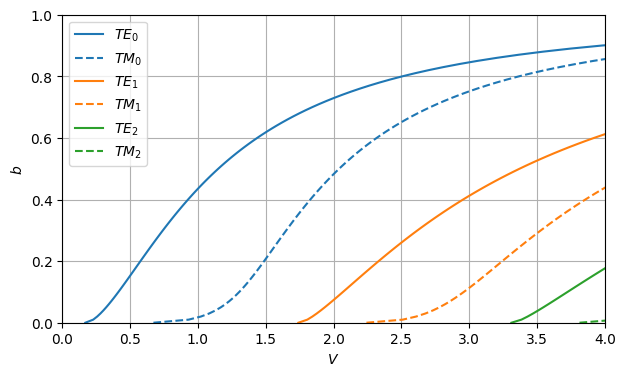

In [23]:
b = np.linspace(0, 0.99, 100) # When b -> 1, V -> infinity

v_max = 4 # Maximum value of the normalized frequency that we want to visualize

M = Vcm(v_max)

V_te= V_TE(b, M)
V_tm = V_TM(b, M)

cmap = plt.get_cmap("tab10")

plt.figure(figsize=(7,4))
for m in range(0, M, 1):
    plt.plot(V_te[m], b, color = cmap(m), label = f'$TE_{m}$')
    plt.plot(V_tm[m], b, color = cmap(m), linestyle = '--', label = f'$TM_{m}$')
plt.xlabel(r'$V$')
plt.ylabel(r'$b$')
plt.xlim(0,v_max)
plt.ylim(0,1)
plt.grid(True)
plt.legend(loc = 'best')
print('Visualizing the first %d modes.' %M)
print('Asymmetry parameter: \u03B4 = %.5f.' %d)
plt.show()

The normalized propagation constant and the normalized frequency of the waveguide are related to the propagation constant $\beta$ and the frequency $f$ through the following expressions:

$$b = \frac{\beta^{2}-{k_{0}}^{2}{n_{s}}^{2}}{{k_{0}}^{2}{n_{f}}^{2}-{k_{0}}^{2}{n_{s}}^{2}} = \frac{{n_{eff}}^{2} - {n_{s}}^{2}}{{n_{f}}^{2} - {n_{s}}^{2}}$$

<br>

$$V = \frac{2\pi f}{c}a\sqrt{{n_{f}}^{2} - {n_{s}}^{2}} = k_{0}a\sqrt{{n_{f}}^{2} - {n_{s}}^{2}}$$

<br>

With the first equation, we can plot the effective index $n_{eff}$ as a function of the normalized frequency $V$.

Visualizing the first 3 modes.
Asymmetry parameter: δ = 0.12500.


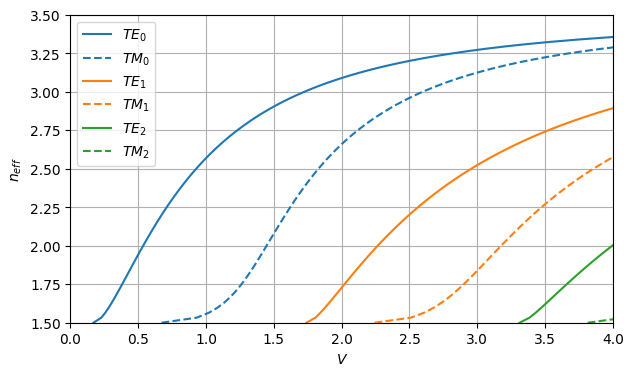

In [24]:
neff = np.sqrt(b*(nf**2 - ns**2) + ns**2) 

plt.figure(figsize=(7,4))
for m in range(0, M, 1):
    plt.plot(V_te[m], neff, color = cmap(m), label = f'$TE_{m}$')
    plt.plot(V_tm[m], neff, color = cmap(m), linestyle = '--', label = f'$TM_{m}$')
plt.xlabel(r'$V$')
plt.ylabel(r'$n_{eff}$')
plt.xlim(0,v_max)
plt.ylim(np.min(neff),3.5)
plt.grid(True)
plt.legend(loc = 'best')
print('Visualizing the first %d modes.' %M)
print('Asymmetry parameter: \u03B4 = %.5f.' %d)
plt.show()

Lastly, we can plot the propagation constant $\beta$ as a function of the normalized frequency, using que relation:

$$\beta = k_{0}n_{eff}$$

Visualizing the first 3 modes.
Asymmetry parameter: δ = 0.12500.


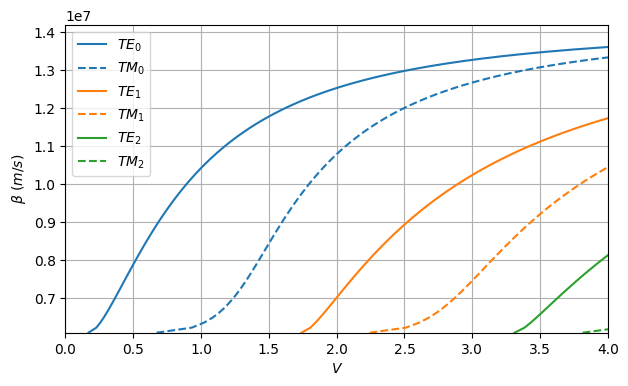

In [25]:
beta = k0 * neff

plt.figure(figsize=(7,4))
for m in range(0, M, 1):
    plt.plot(V_te[m], beta, color = cmap(m), label = f'$TE_{m}$')
    plt.plot(V_tm[m], beta, color = cmap(m), linestyle = '--', label = f'$TM_{m}$')
plt.xlabel(r'$V$')
plt.ylabel(r'$\beta$ $(m/s)$')
plt.xlim(0,v_max)
plt.ylim(k0*np.min(neff),k0*3.5)
plt.grid(True)
plt.legend(loc = 'best')
print('Visualizing the first %d modes.' %M)
print('Asymmetry parameter: \u03B4 = %.5f.' %d)
plt.show()